# Data Exploration - First Pass
---

In [70]:
%%time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  datetime import datetime as dt
plt.style.use('fivethirtyeight')
%matplotlib inline

CPU times: user 1.08 ms, sys: 736 µs, total: 1.82 ms
Wall time: 1.72 ms


In [48]:
df_temp = pd.read_csv ('../data/firstPass/GlobalTemperatures.csv', parse_dates = ['dt'])

---
### A Random Slice of the Original Dataset
---

In [45]:
df_temp.sample (5)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
712,1809-05-01 00:00:00,9.243,1.304,NaN,NaN,NaN,NaN,NaN,NaN
2103,1925-04-01,8.442,0.244,14.538,0.272,2.178,0.315,15.011,0.124
2043,1920-04-01,8.293,0.272,14.141,0.298,2.164,0.419,15.079,0.145
806,1817-03-01 00:00:00,4.569,2.153,NaN,NaN,NaN,NaN,NaN,NaN
1240,1853-05-01 00:00:00,10.975,0.743,16.543,3.360,4.364,0.782,15.793,0.261


---
### Remove unnecessary columns
---
In the first pass, I am only concentrating on the 'LandAverageTemperature' column and its associated 'Uncertainty' value. For this reason, I am removing the following columns in the dataset:
  - LandMaxTemperature
  - LandMaxTemperatureUncertainty
  - LandMinTemperature
  - LandMinTemperatureUncertainty
  - LandAndOceanAverageTemperature
  - LandAndOceanAverageTemperatureUncertainty

In [49]:
df_temp = df_temp.drop (['LandMaxTemperature', 'LandMaxTemperatureUncertainty'], axis = 1)
df_temp = df_temp.drop (['LandMinTemperature', 'LandMinTemperatureUncertainty'], axis = 1)
df_temp = df_temp.drop (['LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperatureUncertainty'], axis = 1)
df_temp.sample (5)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
3108,2009-01-01,3.687,0.078
2916,1993-01-01,3.301,0.096
2931,1994-04-01,9.018,0.044
2109,1925-10-01,9.196,0.193
1826,1902-03-01,4.883,0.228


---
### Rename columns
---
I am ranaming the remaining columns in the dataframe to simpler names for easier reference later on.

In [50]:
df_temp = df_temp.rename (index = str, columns = {'LandAverageTemperature': 'avgTemp', 'LandAverageTemperatureUncertainty': 'uncertainty'})
df_temp.sample (5)

,dt,avgTemp,uncertainty
169,1764-02-01 00:00:00,6.162,2.868
2411,1950-12-01,3.528,0.152
1698,1891-07-01 00:00:00,13.930,0.338
2128,1927-05-01,11.104,0.297
373,1781-02-01 00:00:00,2.267,3.581


---
### Feature Engineering - Extract 'Year' of each sample
---
I want to extract a single represetative value of Earth's land temperature reading for each year in the dataframe. To achieve that, here I extract the 'year' from each temperature reading as the first step.

In [51]:
# Extract year from each reading
df_temp ['year'] = pd.DatetimeIndex (df_temp ['dt']).year
df_temp = df_temp.drop (['dt'], axis = 1)
df_temp.tail ()

,avgTemp,uncertainty,year
3187,14.755,0.072,2015
3188,12.999,0.079,2015
3189,10.801,0.102,2015
3190,7.433,0.119,2015
3191,5.518,0.100,2015


---
### Taking 'Uncertainty' into account
---

In [53]:
df_temp ['maxAvgTemp'] = df_temp ['avgTemp'] + df_temp ['uncertainty']
df_temp ['minAvgTemp'] = df_temp ['avgTemp'] - df_temp ['uncertainty']
df_temp.sample (5)

,avgTemp,uncertainty,year,maxAvgTemp,minAvgTemp
341,11.731,3.975,1778,15.706,7.756
768,1.502,2.622,1814,4.124,-1.120
936,0.595,2.036,1828,2.631,-1.441
2610,14.331,0.169,1967,14.500,14.162
1039,12.830,1.362,1836,14.192,11.468


---
### Aggregate temperature values by year
---

In [54]:
df_aggTemp = df_temp.groupby ('year')[['avgTemp', 'maxAvgTemp', 'minAvgTemp']].mean ()
df_aggTemp.sample (5)

,avgTemp,maxAvgTemp,minAvgTemp
year,,,
1828,8.165333,9.813750,6.516917
1825,8.389333,9.897167,6.881500
2014,9.570667,9.660833,9.480500
1750,8.719364,11.357182,6.081545
1899,8.396333,8.721083,8.071583


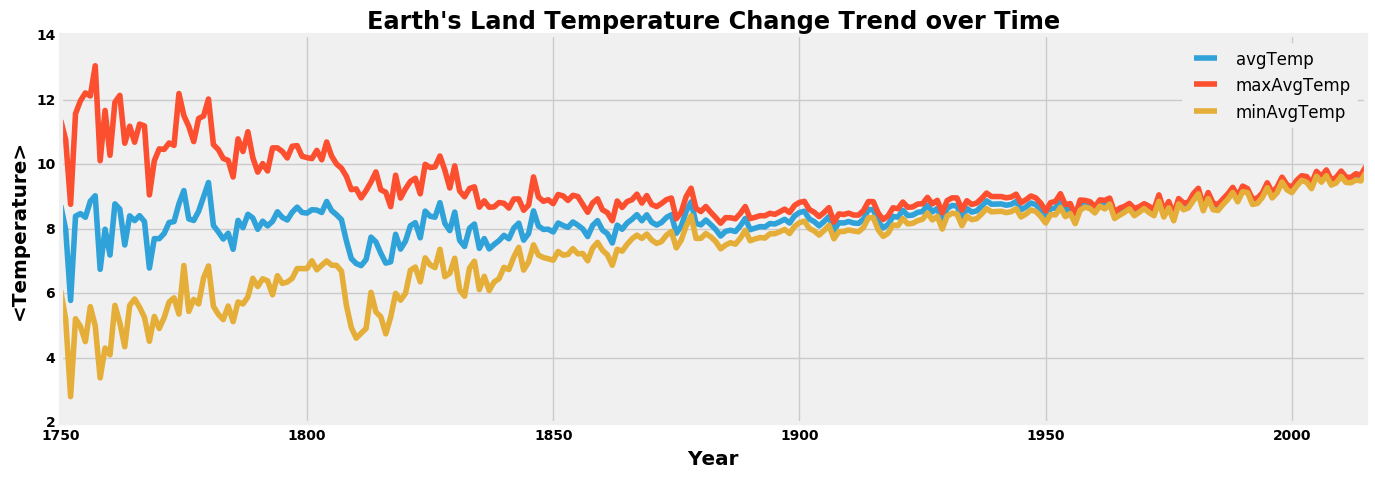

In [77]:
df_aggTemp.plot (figsize = (15, 5))
plt.xlabel ('Year', fontweight = 'bold', fontsize = 'x-large')
plt.ylabel ('<Temperature>', fontweight = 'bold', fontsize = 'x-large')
plt.xticks (fontweight = 'bold')
plt.yticks (fontweight = 'bold')
plt.title ('Earth\'s Land Temperature Change Trend over Time', fontweight = 'bold', fontsize = 'xx-large')
plt.grid ('on')
plt.show ()

---
## Observation
---
From the trend plot above, we can see that the temperature data prior to year **1900** is not very reliable. In order to get *saner* trend lines, I will slice the dataframe to only retain values post 1900.

In [73]:
df_aggTempPost1900 = df_aggTemp [df_aggTemp.index > 1899]
df_aggTempPost1900.head ()

,avgTemp,maxAvgTemp,minAvgTemp
year,,,
1900,8.501583,8.816333,8.186833
1901,8.541917,8.848167,8.235667
1902,8.304417,8.597167,8.011667
1903,8.220167,8.510167,7.930167
1904,8.090917,8.377333,7.804500


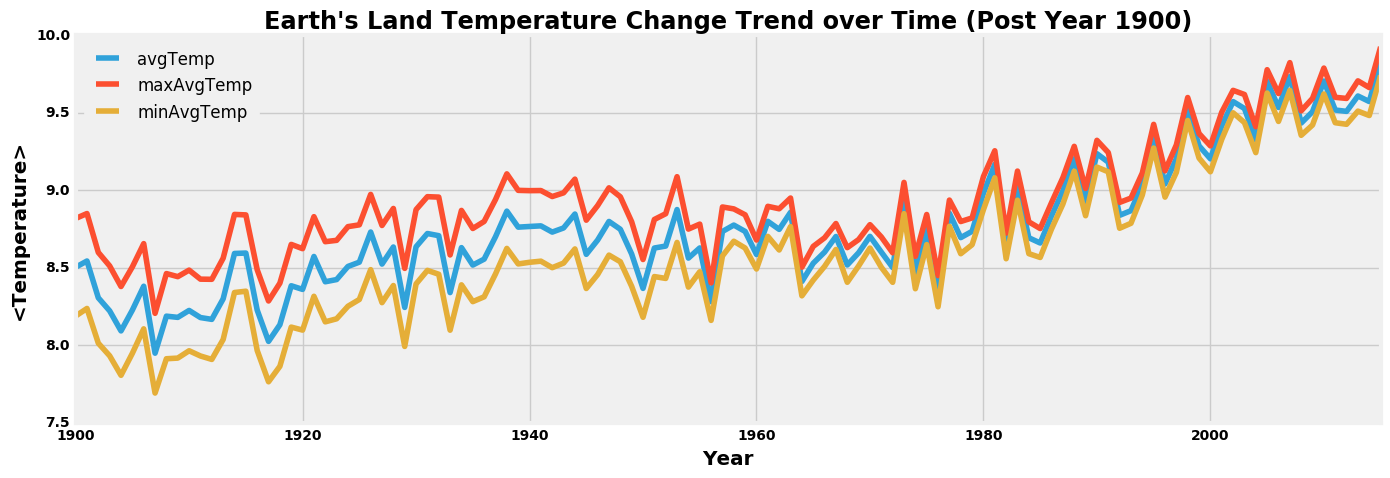

In [76]:
df_aggTempPost1900.plot (figsize = (15, 5))
plt.xlabel ('Year', fontweight = 'bold', fontsize = 'x-large')
plt.ylabel ('<Temperature>', fontweight = 'bold', fontsize = 'x-large')
plt.xticks (fontweight = 'bold')
plt.yticks (fontweight = 'bold')
plt.title ('Earth\'s Land Temperature Change Trend over Time (Post Year 1900)', fontweight = 'bold', fontsize = 'xx-large')
plt.grid ('on')
plt.show ()

The trend of temperature change post year 1900 is more statistically significant. I propose that for all our datasets, we concentrate on the range of values post 1900 as well.